In [26]:
!pip install torch 

In [27]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import os


In [28]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)


In [29]:
image_vectors = []
for img, _ in train_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)
image_vectors = np.array(image_vectors)

In [30]:
pca = PCA(n_components=50)  # Reduce to 50 dimensions
pca_features = pca.fit_transform(image_vectors)

# Plot explained variance
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler  # ✅ Import StandardScaler


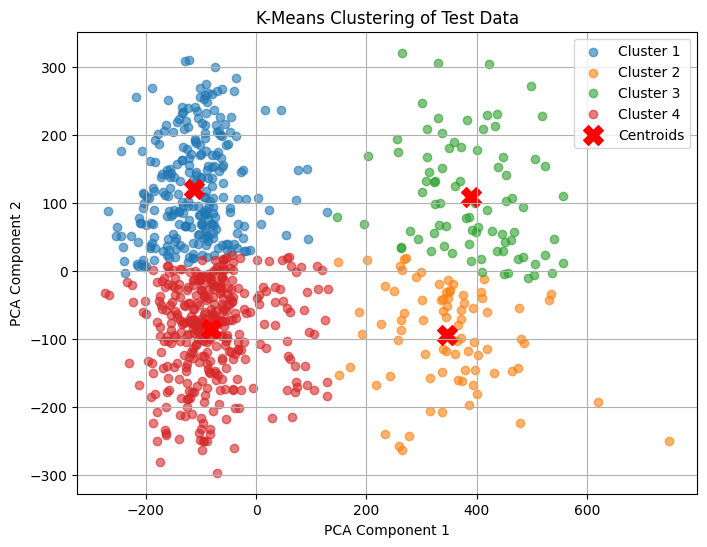

In [32]:

# Set test data path
test_dir = r"Z:\sem 6\Hyperspectrum\Dataset5\dataset1\test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
for img, _ in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# ✅ Standardize the features (Fixing NameError)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2D
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Plot the Clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(pca_features[clusters == i, 0], pca_features[clusters == i, 1], label=f'Cluster {i+1}', alpha=0.6)

# Mark cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker="X", s=200, c="red", label="Centroids")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of Test Data")
plt.legend()
plt.grid()
plt.show()

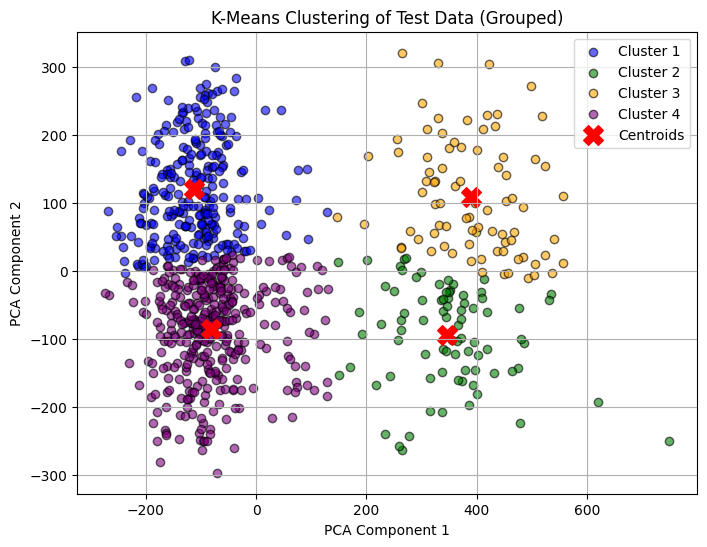

In [33]:


# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
labels = []
for img, label in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)
    labels.append(label)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2D for plotting
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Plot the Clusters with Grouping
plt.figure(figsize=(8, 6))

# Define unique colors for clusters
colors = ['blue', 'green', 'orange', 'purple']
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i in range(k):
    plt.scatter(pca_features[clusters == i, 0], pca_features[clusters == i, 1], 
                color=colors[i], label=cluster_names[i], alpha=0.6, edgecolors='black')

# Mark cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker="X", s=200, c="red", label="Centroids")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of Test Data (Grouped)")
plt.legend()
plt.grid()
plt.show()

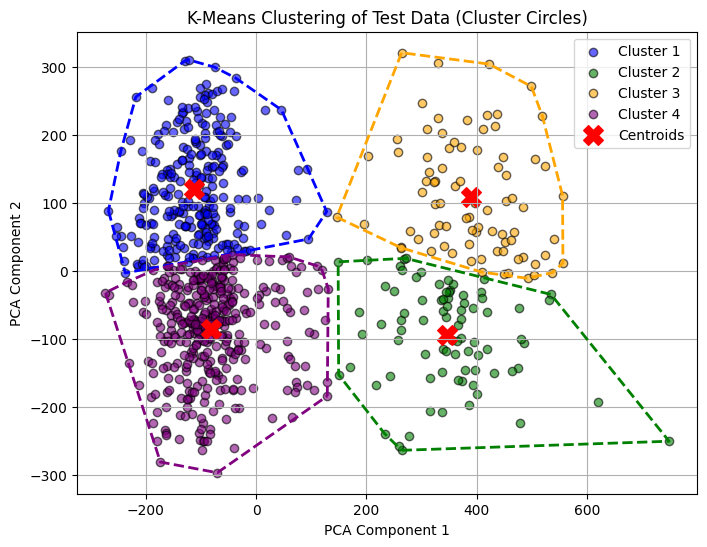

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull

# Set test data path
test_dir = r"Z:\sem 6\Hyperspectrum\Dataset5\dataset1\test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
labels = []
for img, label in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)
    labels.append(label)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2D for plotting
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Plot the Clusters with Circles
plt.figure(figsize=(8, 6))

# Define unique colors for clusters
colors = ['blue', 'green', 'orange', 'purple']
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i in range(k):
    # Get all points belonging to this cluster
    cluster_points = pca_features[clusters == i]
    
    # Scatter plot for cluster points
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors[i], label=cluster_names[i], alpha=0.6, edgecolors='black')
    
    # Draw a convex hull (circle around cluster)
    if len(cluster_points) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_points)
        hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the shape
        plt.plot(cluster_points[hull_points, 0], cluster_points[hull_points, 1], 
                 linestyle="dashed", color=colors[i], linewidth=2)

# Mark cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker="X", s=200, c="red", label="Centroids")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of Test Data (Cluster Circles)")
plt.legend()
plt.grid()
plt.show()


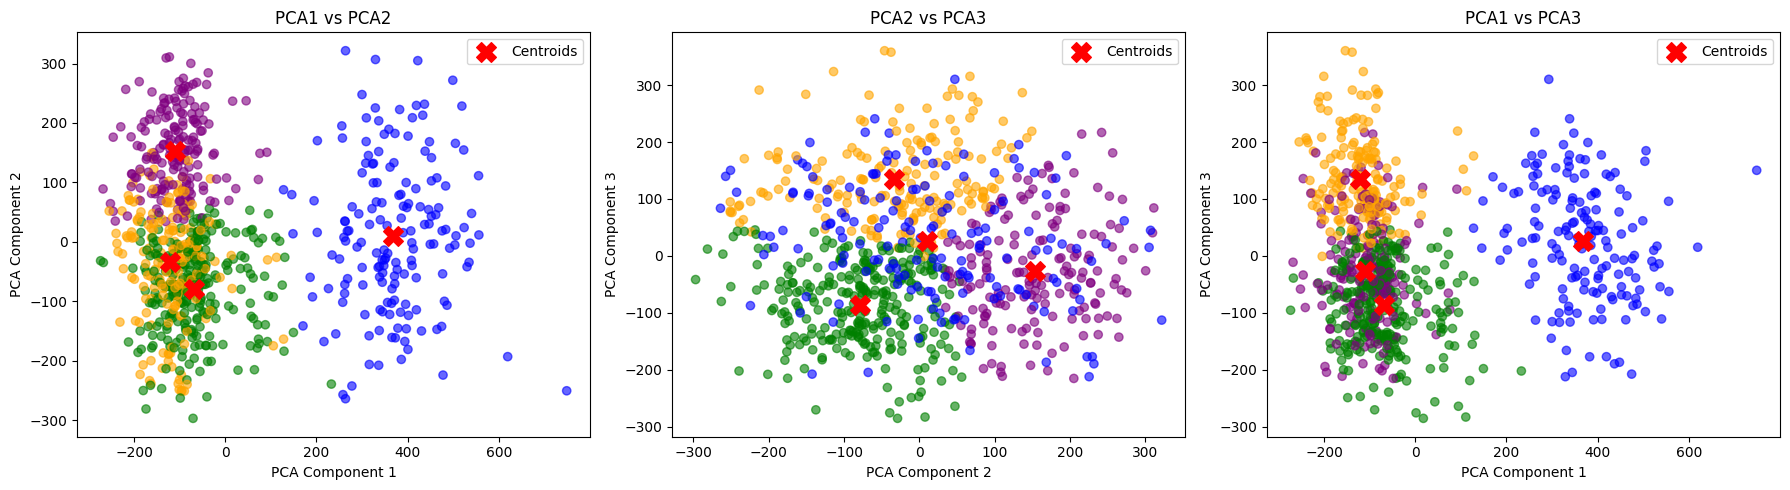

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Set test data path
test_dir = r"Z:\sem 6\Hyperspectrum\Dataset5\dataset1\test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
for img, _ in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA (Reduce to 3D for better visualization)
pca = PCA(n_components=3)  # Reduce to 3 principal components
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Define cluster colors
colors = ['blue', 'green', 'orange', 'purple']
cluster_colors = [colors[label] for label in clusters]

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot PCA1 vs PCA2
axes[0].scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_colors, alpha=0.6)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", s=200, c="red", label="Centroids")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")
axes[0].set_title("PCA1 vs PCA2")
axes[0].legend()

# Plot PCA2 vs PCA3
axes[1].scatter(pca_features[:, 1], pca_features[:, 2], c=cluster_colors, alpha=0.6)
axes[1].scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker="X", s=200, c="red", label="Centroids")
axes[1].set_xlabel("PCA Component 2")
axes[1].set_ylabel("PCA Component 3")
axes[1].set_title("PCA2 vs PCA3")
axes[1].legend()

# Plot PCA1 vs PCA3
axes[2].scatter(pca_features[:, 0], pca_features[:, 2], c=cluster_colors, alpha=0.6)
axes[2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], marker="X", s=200, c="red", label="Centroids")
axes[2].set_xlabel("PCA Component 1")
axes[2].set_ylabel("PCA Component 3")
axes[2].set_title("PCA1 vs PCA3")
axes[2].legend()

plt.tight_layout()
plt.show()


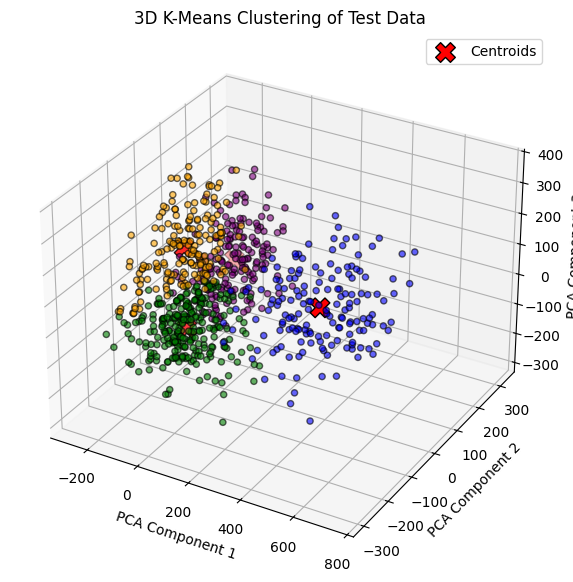

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Set test data path
test_dir = r"Z:\sem 6\Hyperspectrum\Dataset5\dataset1\test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
for img, _ in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA (Reduce to 3D)
pca = PCA(n_components=3)  
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Define cluster colors
colors = ['blue', 'green', 'orange', 'purple']
cluster_colors = [colors[label] for label in clusters]

# Create 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=cluster_colors, alpha=0.6, edgecolors='k')

# Plot cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           marker="X", s=200, c="red", label="Centroids", edgecolors='black')

# Labels and title
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D K-Means Clustering of Test Data")

# Show legend
ax.legend()
plt.show()


In [37]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Set test data path
test_dir = r"Z:\sem 6\Hyperspectrum\Dataset5\dataset1\test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
for img, _ in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA (Reduce to 3D)
pca = PCA(n_components=3)  
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Define cluster colors
colors = ['blue', 'green', 'orange', 'purple']
cluster_colors = [colors[label] for label in clusters]

# Create interactive 3D scatter plot
fig = go.Figure()

# Add clustered data points
fig.add_trace(go.Scatter3d(
    x=pca_features[:, 0], 
    y=pca_features[:, 1], 
    z=pca_features[:, 2],
    mode='markers',
    marker=dict(size=5, color=clusters, colorscale='viridis', opacity=0.8),
    text=[f"Cluster {c}" for c in clusters]  # Show cluster number on hover
))

# Add cluster centers
fig.add_trace(go.Scatter3d(
    x=kmeans.cluster_centers_[:, 0], 
    y=kmeans.cluster_centers_[:, 1], 
    z=kmeans.cluster_centers_[:, 2],
    mode='markers',
    marker=dict(size=10, color='red', symbol='x'),
    name="Centroids"
))

# Labels and title
fig.update_layout(
    title="Interactive 3D K-Means Clustering of Test Data",
    scene=dict(
        xaxis_title="PCA Component 1",
        yaxis_title="PCA Component 2",
        zaxis_title="PCA Component 3"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the interactive plot
fig.show()


Z:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Z:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
pip install --upgrade numexpr bottleneck
